# Hate Speech Detection using Python

## Importing all the necessary Python libraries and the dataset we need for this task:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("C:\\Users\\swarnim\\OneDrive\\Desktop\\twitter.csv")
import warnings
warnings.filterwarnings('ignore')
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


## I will add a new column to this dataset as labels which will contain the values as:

    1.Hate Speech 
    2.Offensive Language 
    3.No Hate and Offensive

In [2]:
data["labels"] = data["class"].map({0: "Hate Speech", 
                                    1: "Offensive Language", 
                                    2: "No Hate and Offensive"})
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [3]:
data = data[["tweet", "labels"]]
data.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [4]:
data['labels'].isnull().sum()

0

In [5]:
data['labels'].value_counts()

Offensive Language       19190
No Hate and Offensive     4163
Hate Speech               1430
Name: labels, dtype: int64

<AxesSubplot:xlabel='labels', ylabel='count'>

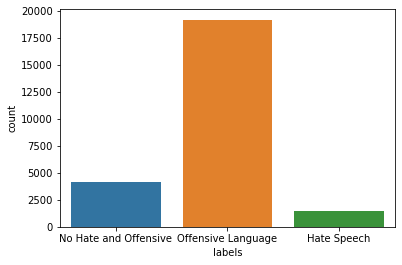

In [6]:
sns.countplot(x ='labels', data = data)

## Clearly shows our data is imbalanced

## Importing Python libraries for Text Transformation and NLP Libraries

In [7]:
import re
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

## Created a function to clean the texts in the tweet column:

In [8]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [9]:
data["tweet"] = data["tweet"].apply(clean)

In [10]:
data.head()

,tweet,labels
0,rt mayasolovely woman shouldnt complain clean...,No Hate and Offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabased look like tranny,Offensive Language
4,rt shenikaroberts shit hear might true might ...,Offensive Language


## Now let’s split the dataset into training and test sets:

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

In [13]:
#from imblearn.over_sampling import SMOTE

In [14]:
from collections import Counter
counter=Counter(y)
print(counter)

Counter({'Offensive Language': 19190, 'No Hate and Offensive': 4163, 'Hate Speech': 1430})


In [15]:
#smt=SMOTE()

In [16]:
#cv = CountVectorizer()
#X = cv.fit_transform(x)
tf=TfidfVectorizer()
X=tf.fit_transform(x).toarray()
#x_sm,y_sm=smt.fit_resample(X,y)


In [17]:
#counter=Counter(y_sm)
#print(counter)


# Data Training and Modeling

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,f1_score,precision_score

In [20]:
model_accuracy= accuracy_score(preds,y_test)
model_precision= precision_score(preds,y_test,average='micro')
model_recall= recall_score(preds,y_test,average='micro')
model_f1_score= f1_score(preds, y_test,average='micro')
print('Performance of RandomForestClassifier Classifier')
print('Accuracy :' , model_accuracy)
print('Precision :', model_precision)
print('Recall :', model_recall)
print('F1 Score :', model_f1_score)

Performance of RandomForestClassifier Classifier
Accuracy : 0.8925112976113622
Precision : 0.8925112976113622
Recall : 0.8925112976113622
F1 Score : 0.8925112976113622


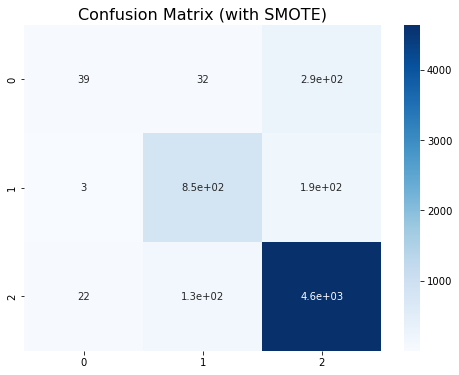

In [21]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

# LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predictions= lr.predict(X_test)

#Performance Metrics
lr_accuracy= accuracy_score(lr_predictions,y_test)
lr_precision= precision_score(lr_predictions,y_test,average='micro')
lr_recall= recall_score(lr_predictions,y_test,average='micro')
lr_f1_score= f1_score(lr_predictions, y_test,average='micro')

print('Performance of Logistic Regression Classifier')
print('Accuracy :' , lr_accuracy)
print('Precision :', lr_precision)
print('Recall :', lr_recall)
print('F1 Score :', lr_f1_score)

Performance of Logistic Regression Classifier
Accuracy : 0.8892834086507424
Precision : 0.8892834086507424
Recall : 0.8892834086507424
F1 Score : 0.8892834086507424


# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predictions= knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test,average='micro')
knn_recall= recall_score(knn_predictions,y_test,average='micro')
knn_f1_score= f1_score(knn_predictions, y_test,average='micro')

print('Performance of KNN Classifier')
print('Accuracy :' , knn_accuracy)
print('Precision :', knn_precision)
print('Recall :', knn_recall)
print('F1 Score :', knn_f1_score)

Performance of KNN Classifier
Accuracy : 0.26081342801807617
Precision : 0.26081342801807617
Recall : 0.26081342801807617
F1 Score : 0.26081342801807617


# DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dTree= DecisionTreeClassifier()
dTree.fit(X_train,y_train)
dTree_predictions= dTree.predict(X_test)
dTree_accuracy= accuracy_score(dTree_predictions,y_test)
dTree_precision= precision_score(dTree_predictions,y_test,average='micro')
dTree_recall= recall_score(dTree_predictions,y_test,average='micro')
dTree_f1_score= f1_score(dTree_predictions, y_test,average='micro')
print('Performance of DecisionTreeClassifier')
print('Accuracy :' , dTree_accuracy)
print('Precision :', dTree_precision)
print('Recall :', dTree_recall)
print('F1 Score :', dTree_f1_score)

Performance of DecisionTreeClassifier
Accuracy : 0.867817947062621
Precision : 0.867817947062621
Recall : 0.867817947062621
F1 Score : 0.867817947062621


# Testing

In [26]:
sample = "Everything is going great in the country"
data = tf.transform([sample]).toarray()
print(model.predict(data))

['No Hate and Offensive']


In [27]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

In [28]:
print(cm)

[[  39   32  290]
 [   3  852  186]
 [  22  133 4639]]


In [29]:
cr=classification_report(y_test,y_pred)

In [30]:
print(cr)

                       precision    recall  f1-score   support

          Hate Speech       0.61      0.11      0.18       361
No Hate and Offensive       0.84      0.82      0.83      1041
   Offensive Language       0.91      0.97      0.94      4794

             accuracy                           0.89      6196
            macro avg       0.78      0.63      0.65      6196
         weighted avg       0.88      0.89      0.87      6196

